<div>
<h1>Run the cell below to generate the road map (do not modify it)</h1></div>

In [7]:
%%javascript
var kernel = IPython.notebook.kernel;var thename = window.document.getElementById("notebook_name").innerHTML;var command = "THE_NOTEBOOK = " + "'"+thename+"'";kernel.execute(command);command="os.environ['THE_NOTEBOOK'] = THE_NOTEBOOK";kernel.execute(command);var cell = IPython.notebook.get_cell(2);cell.execute();IPython.notebook.get_cell(3).focus_cell();var x = $('.code_cell');$(x[1]).children('.input').hide();

<IPython.core.display.Javascript object>

In [8]:
outputdir = "/tmp/tools/"
!mkdir -p $outputdir
!wget "https://www.dropbox.com/s/4g0pigmro4vo1b4/menutemplate?dl=0" -O /tmp/tools/menutemplate >> /tmp/toollog 2>&1 
!wget "https://www.dropbox.com/s/3flttpzhsja8td7/construct_menu.py?dl=0" -O /tmp/tools/construct_menu.py >> /tmp/toollog 2>&1 
!python /tmp/tools/construct_menu.py "{THE_NOTEBOOK}.ipynb" {outputdir}
from IPython.core.display import HTML
output_file_name = outputdir + THE_NOTEBOOK.replace(" ", "").replace("[", "").replace("]", "") + ".ipynb.html"
with open(output_file_name) as fp:
    html = fp.read()
HTML(html)

IOError: [Errno 2] No such file or directory: '/tmp/tools/monte_calo_sim.ipynb.html'

# Estimating Financial Risk through Monte Carlo Simulation
Risk analysis is part of every decision we make when faced with uncertainty, ambiguity, and variability. Indeed, even though we have unprecedented access to information, we can't accurately predict the future. In finance, there is a fair amount of uncertainty and risk involved with estimating the future value of financial products, due to the wide variety of potential outcomes. Monte Carlo simulation (also known as the Monte Carlo Method) allows inspecting many possible outcomes of the decision making process, and can be used to assess the impact of risk: this, in turns, allows for better decision making under uncertainty.

## Goals
The main objectives we set for this Notebook are as follows:
1. Develop fudamental knowledge about Risk analysis
2. Understand Monte Carlo Simulation (MCS)
3. Apply Monte Carlo Simulation for predicting risk


## Steps
1. First, in section 1, we introduce the basics of MCS
2. In section 2, we work on a simple example to where we apply the MCS method
3. In section 3, we briefly summarize the main characteristics of the Monte Carlo Simulation (MCS) technique
4. In section 4, we overview the common distributions which are often used in MCS
5. In section 5, we work on a real use case, that focuses on estimating financial risk. We will use techniques such as featurizing (that is, generating additional features to improve model accuracy), linear regression, kernel density estimation, sampling distributions and so on ...

## Reference
This Notebook is inspired by Chapter 9 of the book [Advanced Analytics with Spark](http://shop.oreilly.com/product/0636920035091.do) by Josh Wills, Sandy Ryza, Sean Owen, and Uri Laserson. It is strongly suggested to read this Chapter to get a general idea of the topic of this Notebook.

# 1. Introduction

## 1.1. Monte Carlo Simulation (MCS)
Monte Carlo simulation is a computerized mathematical technique that can be applied such that it is possible to account for risk in quantitative analysis and decision making. This technique is used in many different fields, such as R&D, risk management, portfolio management, pricing derivatives, strategic planning, project planning, cost modeling and many more.

In general, MCS is a technique that "converts" uncertainty on input variables of a model into **probability distributions**. By combining the distributions and randomly selecting values from them, it recalculates the simulated model many times, to determine the probability of the output.

Historically, this technique was first used by scientists working on the atomic bomb: it was named after Monte Carlo, the Monaco resort town renowned for its casinos.  Since its introduction in World War II, Monte Carlo simulation has been used to model a variety of physical and conceptual systems.

## 1.2. How does it work?
Monte Carlo simulation performs risk analysis by building models of possible results by *substituting a range of possible input values, that constitute uncertainty, into a statistical distribution*. It then computes possible outcomes repeatedly, each time using a different set of random values from the probability functions that "model" the input. Depending upon the number of random input variables and their distribution, a Monte Carlo simulation could involve thousands or tens of thousands of "rounds" before it is complete. When complete, *Monte Carlo simulation produces distributions of possible outcome values*.

By using probability distributions instead of actual input samples, it is possible to model more accurately uncertainty: different choices of distributions will yield different outputs.

# 2. Illustrative example

Imagine you are the marketing manager for a firm that is planning to introduce a new product. You need to estimate the first year net profit from this product, which might depend on:

- Sales volume in units
- Price per unit (also called "Selling price")
- Unit cost
- Fixed costs

Net profit will be calculated as $Net Profit = Sales Volume* (Selling Price - Unit cost) - Fixed costs$.  Fixed costs (accounting for various overheads, advertising budget, etc.) are known to be \$ 120,000, which we assume to be deterministic. All other factors, instead, involve some uncertainty: *sales volume* (in units) can cover quite a large range, the *selling price* per unit will depend on competitor actions, which are hard to predict, and *unit costs* will also vary depending on vendor prices and production experience, for example.

Now, to build a risk analysis model, we must first identify the uncertain variables -- which are essentially random variables.  While there's some uncertainty in almost all variables in a business model, we want to focus on variables where the range of values is significant.

## 2.1. Unit sales and unit price

Based on an hypothetical market research you have done, you have beliefs that there are equal chances for the market to be `slow`, `normal`, or `hot`:

- In a "slow" market, you expect to sell 50,000 units at an average selling price of \$11.00 per unit
- In a "normal" market, you expect to sell 75,000 units, but you'll likely realize a lower average selling price of \$10.00 per unit
- In a "hot" market, you expect to sell 100,000 units, but this will bring in competitors, who will drive down the average selling price to \$8.00 per unit

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>
### Question 1

Calculate the average units and the unit price that you expect to sell, which depend on the market state. Use the assumptions above to compute the expected quantity of products and their expected unit price. 


In [177]:
average_unit = (50000 + 75000 + 100000) / 3
average_price = (11 + 10 + 8) / 3
print("average unit:", average_unit)
print("average_price:", average_price)

average unit: 75000.0
average_price: 9.666666666666666


## 2.2. Unit Cost

Another uncertain variable is Unit Cost. In our illustrative example, we assume that your firm's production manager advises you that unit costs may be anywhere from \$5.50 to \$7.50, with a most likely expected cost of \$6.50. In this case, the most likely cost can be considered as the average cost.

## 2.3. A Flawed Model: using averages to represent our random variables
Our next step is to identify uncertain functions -- also called functions of a random variable.  Recall that Net Profit is calculated as $Net Profit = Sales Volume * (Selling Price - Unit cost) - Fixed costs$.  However, Sales Volume, Selling Price and Unit Cost are all uncertain variables, so Net Profit is an uncertain function.

The most simple model to predict the Net Profit is using average of sales volume, average of selling price and average of unit cost for calculating. So, if only consider averages, we can say that the $Net Profit = 75,000*(9.66666666 - 6.5) - 120,000 \sim 117,500$.

However, as [Dr. Sam Savage](http://web.stanford.edu/~savage/faculty/savage/) warns, "Plans based on average assumptions will be wrong on average." The calculated result is far from the actual value: indeed, the **true average Net Profit** is roughly  \$93,000, as we will see later in the example.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>
### Question 2
#### Question 2.1
Write a function named `calNetProfit` to calculate the Net Profit using the average of sales volume, the average of selling price and the average of unit cost.

In [178]:
def calNetProfit(average_unit, average_price, average_unitcost, fixed_cost):
    return average_unit * (average_price - average_unitcost) - fixed_cost

average_unitcost = 6.5
fixed_cost = 120000
NetProfit = calNetProfit(average_unit, average_price, average_unitcost, fixed_cost)
print("Net profit:", NetProfit)

Net profit: 117499.99999999994


<div class='anchor' ></div>
#### Question 2.2
Verify the warning message of Dr. Sam Savage by calculating the error of our estimated Net Profit using averages only. Recall that the true value is roughly \$93,000, so we are interested in:

$$ error = \frac{your\_value - true\_value}{true\_value}$$

Note also we are interested in displaying the error as a percentage.

Looking at the error we make, do you think that we can use the current model that only relies on averages?

In [179]:
trueNetProfit = 93000
error = (NetProfit - trueNetProfit) / (trueNetProfit)
print("Error in percentage:", error * 100)

Error in percentage: 26.344086021505316


<div class="comment">

PUT YOUR COMMENT HERE

</div>

## 2.4. Using the Monte Carlo Simulation method to improve our model
As discussed before, the selling price and selling volume both depend on the state of the market scenario (slow/normal/hot). So, the net profit is the result of two random variables: `market scenario` (which in turn determines `sales volumes` and `selling price`) and `unit cost`.

Now, let's assume (this is an *a-priori* assumption we make) that `market scenario` follows a discrete, uniform distribution and that `unit cost` also follows a uniform distribution. Then, we can compute directly the values for selling price and selling volumes based on the outcome of the random variable `market scenario`, as shown in Section 2.1.

From these a-priori distributions, in each run (or trial) of our Monte Carlo simulation, we can generate the sample value for each random variable and use it to calculate the Net Profit. The more simulation runs, the more accurate our results will be. For example, if we run the silmulation 100,000 times, the average net profit will amount to roughly \$92,600. Every time we run the simulation, a different prediction will be output: the average of such predictions will consistently be less than \$117,500, which we predicted using averages only.

Note also that in this simple example, we generate values for the `market scenario` and `unit cost` independently: we consider them to be **independent random variables**. This means that the eventual (and realistic!) correlation between the `market scenario` and `unit cost` variables is ignored. Later, we will learn how to be more precise and account for dependency between random variables.


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>
### Question 3
#### Question 3.1
Write a function named `get_sales_volume_price` that returns the sales volume and price based on the market scenario. In particular, the scenario can get one of three values:

* 0: Slow market
* 1: Normal market
* 2: Hot market

The return value is a tuple in the form: `(sales_volume, price)`

In [180]:
# Get sales volume and  price based on market scenario
# the function returns a tuple of (sales_volume, price)
def get_sales_volume_price(scenario):
    # Slow market
    if scenario == 0:
        return (50000,11)
    # Normal market
    if scenario == 1:
        return (75000,10)
    # Hot market
    if scenario == 2:
        return (100000,8)

<div class='anchor' ></div>
#### Question 3.2
Run 100,000 Monte Carlo simulations and calculate the average net profit they produce. Then, compare the result to the "average model" we used in the previous questions (the one we called "flawed" model). Put your comments about the discrepancies between a simplistic model, and the more accurate MCS approach.

Note that in each iteration, the `unit_cost` and `market_scenario` are generated according to their distributions. Also, recall what we have seen in Section 2.2: your firm account manager helped you with some research, to determine the variability of your random variables.


HINT: 
Funtion `uniform(a,b)` in module `random` generates a number $a<=c<=b$, which is drawn from a uniform distribution.
Function `randint(a,b)` helps you generating an integer number $a<=c<=b$

In [181]:
import random

total = 0.0
num_simulation = 100000
for i in range(0,num_simulation):
    unit_cost = random.uniform(5.5, 7.5)
    market_scenario = random.randint(0, 2)
    sales_volume, price = get_sales_volume_price(market_scenario)
    netProfit = calNetProfit(sales_volume, price, unit_cost, fixed_cost)
    total = total + netProfit

print("average net profit:", total / num_simulation)

average net profit: 92749.50827225231


<div class="comment">
PUT YOUR COMMENT HERE
</div>


# 3. A brief summary of the Monte Carlo Simulation (MCS) technique

- A MCS allows several inputs to be used at the same time to compute the probability distribution of one or more outputs
- Different types of probability distributions can be assigned to the inputs of the model, depending on any *a-priori* information that is available. When the distribution is completely unknown, a common technique is to use a distribution computed by finding the best fit to the data you have
- The MCS method is also called a **stochastic method** because it uses random variables. Note also that the general assumption is for input random variables to be independent from eachother. When this is not the case, there are techniques to account for correlation between random variables.
- A MCS generates the output as a range instead of a fixed value and shows how likely the output value is to occur in that range. In other words, the model outputs a probability distribution.

# 4. Common distributions used in MCS
In what follows, we summarize the most common probability distributions that are used as *a-priori* distributions for input random variables:

- *Normal/Gaussian Distribution*: this is a continuous distribution applied in situations where the mean and the standard deviation of a given input variable are given, and the mean represents the most probable value of the variable. In other words, values "near" the mean are most likely to occur.  This is symmetric distribution, and it is not bounded in its co-domain. It is very often used to  describe natural phenomena, such as people’s heights, inflation rates, energy prices, and so on and so forth. An illustration of a normal distribution is given below:
![normal_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/320px-Normal_Distribution_PDF.svg.png)

- *Lognormal Distribution* : this is a distribution which is appropriate for variables taking values in the range $[0, \infty]$. Values are positively skewed, not symmetric like a normal distribution.  Examples of variables described by a lognormal distributions include, for example, real estate property values, stock prices, and oil reserves. An illustration of a lognormal distribution is given below:
![log_normal_distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/PDF-log_normal_distributions.svg/320px-PDF-log_normal_distributions.svg.png) 

- *Triangular Distribution* : this is a continuous distribution with fixed minimum and maximum values. It is bounded by the minimum and maximum values and can be either symmetrical (the most probable value = mean = median) or asymmetrical. Values around the most likely value (e.g. the mean) are more likely to occur.  Variables that could be described by a triangular distribution include, for example, past sales history per unit of time and inventory levels. An illustration of a triangular distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Triangular_distribution_PMF.png/320px-Triangular_distribution_PMF.png)

- *Uniform Distribution* : this is a continuous distribution bounded by known minimum and maximum values. In contrast to the triangular distribution, the likelihood of occurrence of the values between the minimum and maximum is the same. In other words, all values have an equal chance of occurring, and the distribution is simply characterized by the minimum and maximum values. Examples of variables that can be described by a uniform distribution include manufacturing costs or future sales revenues for a new product. An illustration of the uniform distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)

- *Exponential Distribution* : this is a continuous distribution used to model the time that pass between independent occurrences, provided that the rate of occurrences is known. An example of the exponential distribution is given below:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Exponential_pdf.svg/320px-Exponential_pdf.svg.png)

- *Discrete Distribution* : for this kind of distribution, the "user" defines specific values that may occur and the likelihood of each of them.  An example might be the results of a lawsuit: 20% chance of positive verdict, 30% change of negative verdict, 40% chance of settlement, and 10% chance of mistrial.


# 5. A real use case: estimating the financial risk of a portfolio of stocks
We hope that by now you have a good understanding about Monte Carlo simulation. Next, we apply this method to a real use case: *financial risk estimation*.

Imagine that you are an investor on the stock market. You plan to buy some stocks and you want to estimate the maximum loss you could incur after two weeks of investing. This is the quantity that the financial statistic "Value at Risk" (VaR) seeks to measure. [VaR](https://en.wikipedia.org/wiki/Value_at_risk) is defined as a measure of investment risk that can be used as a reasonable estimate of the maximum probable loss for a value of an investment portfolio, over a particular time period. A VaR statistic depends on three parameters: a portfolio, a time period, and a confidence level. A VaR of 1 million dollars with a 95% confidence level over two weeks, indicates the belief that the portfolio stands only a 5% chance of losing more than 1 million dollars over two weeks. VaR has seen widespread use across financial services organizations. This statistic plays a vital role in determining how much cash investors must hold to meet the credit ratings that they seek. In addition, it is also used to understand the risk characteristics of large portfolios: it is a good idea to compute the VaR before executing trades, such that it can help take informed decisions about investments. 

Our goal is calculating VaR of two weeks interval with 95% confidence level and the associated [VaR confidence interval](http://www.investopedia.com/ask/answers/041615/whats-difference-between-confidence-level-and-confidence-interval-value-risk-var.asp).


## 5.1. Terminology
In this use case, we will use some terms that might require a proper definition, given the domain. This is what we call the *Domain Knowledge*.

- **Instrument**: A tradable asset, such as a bond, loan, option, or stock investment. At any particular time, an instrument is considered to have a value, which is the price for which it can be sold. In the use case of this notebook, instruments are stock investments.
- **Portfolio**: A collection of instruments owned by a financial institution. 
- **Return**: The change in an instrument or portfolio’s value over a time period. 
- **Loss**: A negative return. 
- **Index**: An imaginary portfolio of instruments. For example, the NASDAQ Composite index includes about 3,000 stocks and similar instruments for major US and international companies. 
- **Market factor**: A value that can be used as an indicator of macro aspects of the financial climate at a particular time. For example, the value of an index, the Gross Domestic Product of the United States, or the exchange rate between the dollar and the euro. We will often refer to market factors as just factors.

## 5.2. The context of our use case
We have a list of instruments that we plan to invest in. The historial data of each instrument has been collected for you. For simplicity, assume that the returns of instruments at a given time, depend on 4 market factors only: 

- GSPC value
- IXIC value 
- The return of crude oil
- The return of treasury bonds

Our goal is building a model to predict the loss after two weeks time interval with confidence level set to 95%.

As a side note, it is important to realize that the approach presented in this Notebook is a simplified version of what would happen in a real Financial firm. For example, the returns of instruments at a given time often depend on more than 4 market factors only! Moreovoer, the choice of what constitute an appropriate market factor is an art!



## 5.3. The Data
The stock data can be downloaded (or scraped) from Yahoo! by making a series of REST calls. The data includes multiple files. Each file contains the historical information of each instrument that we want to invest in. The data is in the following format (with some samples):
```
Date, Open, High, Low, Close, Volume, Adj Close
2016-01-22,66.239998,68.07,65.449997,67.860001,137400,67.860001
2016-01-21,65.410004,66.18,64.459999,65.050003,148000,65.050003
2016-01-20,64.279999,66.32,62.77,65.389999,141300,65.389999
2016-01-19,67.720001,67.989998,64.720001,65.379997,178400,65.379997
```

The data of GSPC and IXIC values (our two first market factors) are also available on Yahoo! and use the very same format. 

The crude oil and treasure bonds data is collected from investing.com, and has a different format, as shown below (with some samples):
```
Date    Price   Open    High    Low     Vol.    Change %
Jan 25, 2016    32.17   32.36   32.44   32.10   -       -0.59%
Jan 24, 2016    32.37   32.10   32.62   31.99   -       0.54%
Jan 22, 2016    32.19   29.84   32.35   29.53   -       9.01%
Jan 21, 2016    29.53   28.35   30.25   27.87   694.04K 11.22%
Jan 20, 2016    26.55   28.33   28.58   26.19   32.11K  -6.71%
Jan 19, 2016    28.46   29.20   30.21   28.21   188.03K -5.21%
```

In our use case, the factors' data will be used jointly to build a statiscal model: as a consequence, we first need to preprocess the data to proceed.

## 5.4. Data preprocessing
In this Notebook, all data files have been downloaded for you, such that you can focus on pre-processing. Next, we will:

  - Read the factor data files which are in two different formats, process and merge them together
  - Read the stock data and pre-process it
  - Trim all data into a specific time region
  - Fill in the missing values
  - Generate the data of returns in each two weeks time interval window
  
### Factor data pre-processing

We need two functions to read and parse data from Yahoo! and Investing.com respectively. We are interested only in information about the time and the corresponding returns of a factor or an instrument: as a consequence, we will project away many columns of our RAW data, and keep only the information we are interested in.

The 3000-instrument and the 4-factor history are small enough to be read and processed locally: we do not need to use the power of parallel computing to proceed. Note that this is true also for larger cases with hundreds of thousands of instruments and thousands of factors. The need for a distributed system like Spark comes in when actually **running** the Monte Carlo simulations, which can require massive amounts of computation on each instrument. 

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>

### Question 4
#### Question 4.1
Write a function named `readInvestingDotComHistory` to parse data from investing.com based on the format specified above (see Section 5.3). Recall that we use two factors here: one that is related to the price of crude oil, one that is related to some specific US bonds. 

Print the first 5 entries of the first factor (crude oil price) in the parsed data.

Note that we are only interested in the date and price of stocks.

HINT: You can parse a string to `datetime` object by using the function `strptime(<string>, <dtime_format>)`. In this case, the datetime format is `"%b %d, %Y"`. For more information, please follow this [link](https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior).

In the next cell, we simply copy data from our HDFS cluster (that contains everything we need for this Notebook) to the instance (a Docker container) running your Notebook. This means that you will have "local" data that you can process without using Spark. Note the folder location: find and verify that you have correctly downloaded the files!

In [182]:
! [ -d monte-carlo-risk ] || (echo "Downloading prepared data from HDFS. Please wait..." ; hdfs dfs -copyToLocal /datasets/monte-carlo-risk . ; echo "Done!";)

In [183]:
from datetime import datetime
from datetime import timedelta
from itertools import islice
%matplotlib inline
import numpy as np
import statsmodels.api as sm

base_folder = "monte-carlo-risk/"

factors_folder= base_folder + "factors/"

# read data from local disk
def readInvestingDotComHistory(fname):
    def process_line(line):
        cols = line.split('\t')
        date = datetime.strptime(cols[0], "%b %d, %Y")
        value = float(cols[1])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = list(reversed(content_w_header[1:]))
        return list(map(process_line , content))

factor1_files = ['crudeoil.tsv', 'us30yeartreasurybonds.tsv']
factor1_files = map(lambda fn: factors_folder + fn, factor1_files)
factors1 = [readInvestingDotComHistory(f) for f in factor1_files]

print(factors1[0][:5])

[(datetime.datetime(2006, 1, 26, 0, 0), 66.26), (datetime.datetime(2006, 1, 27, 0, 0), 67.76), (datetime.datetime(2006, 1, 30, 0, 0), 68.35), (datetime.datetime(2006, 1, 31, 0, 0), 67.92), (datetime.datetime(2006, 2, 1, 0, 0), 66.56)]


Now, the data structure `factors1` is a list, containing data that pertains to two (out of a total of four) factors that influence the market, as obtained by investing.com. Each element in the list is a tuple, containing some sort of timestamp, and the value of one of the two factors discussed above. From now on, we call these elements "**records**" or "**entries**". Visually, `factors1` looks like this:

| 0 (crude oil) | 1 (US bonds)|
| --- | --- |
| time_stamp, value | time_stamp, value |
| ... | ... |
| time_stamp, value | time_stamp, value |
| ... | ... |


<div class='anchor' ></div>
#### Question 4.2
Write a function named `readYahooHistory` to parse data from yahoo.com based on its format, as described in Section 5.3. 

Print the first 5 entries of the first factor (namely GSPC). Comment the time range of the second batch of data we use in our Notebook.

Note that we are only interested in the date and price of stocks.

NOTE: The datetime format now is in a different format than the previous one.

HINT: Use a terminal (or put the bash commands inline in your Notebook) to list filenames in your local working directory to find and have a look at your local files.

In [184]:
# read data from local disk
def readYahooHistory(fname):
    def process_line(line):
        cols = line.split(',')
        date = datetime.strptime(cols[0], "%Y-%m-%d")
        value = float(cols[4])
        return (date, value)
    
    with open(fname) as f:
        content_w_header = f.readlines()
        # remove the first line 
        # and reverse lines to sort the data by date, in ascending order
        content = list(reversed(content_w_header[1:]))
        return list(map(process_line , content))
    

factor2_files = ['GSPC.csv', 'IXIC.csv']
factor2_files = map(lambda fn: factors_folder + fn, factor2_files)

factors2 = [readYahooHistory(f) for f in factor2_files]

print(factors2[0][:5])

[(datetime.datetime(1950, 1, 3, 0, 0), 16.66), (datetime.datetime(1950, 1, 4, 0, 0), 16.85), (datetime.datetime(1950, 1, 5, 0, 0), 16.93), (datetime.datetime(1950, 1, 6, 0, 0), 16.98), (datetime.datetime(1950, 1, 9, 0, 0), 17.08)]


<div class="comment">
PUT YOUR COMMENT HERE
</div>

To have an idea about the global economical situation , it is important to observe the variations of the market factors. we propose to plot the evolution of facotrs over time , and define a describe function that 
returns important informations about them.

In [ ]:
plt.figure(1)

plt.subplot(221)
plt.plot()
plt.title('0')

plt.subplot(222)
plt.plot(plotDistribution(factorsReturns[1]))
plt.title('1')

# symmetric log

plt.subplot(223)
plt.plot()
plt.title('GSPC evolution')
#plt.grid(True)

# logit
plt.subplot(224)
plt.plot()
plt.title('IXIC evolution')
#plt.grid(True)

Now, the data structure `factors2` is again list, containing data that pertains to the next two (out of a total of four) factors that influence the market, as obtained by Yahoo!. Each element in the list is a tuple, containing some sort of timestamp, and the value of one of the two factors discussed above. Visually, `factors2` looks like this:

| 0 (GSPC) | 1 (IXIC)|
| --- | --- |
| time_stamp, value | time_stamp, value |
| ... | ... |
| time_stamp, value | time_stamp, value |
| ... | ... |


### Stock data pre-processing

Next, we prepare the data for the instruments we consider in this Notebook (i.e., the stocks we want to invest in). 

<div class='anchor' ></div>

#### Question 4.3
In this Notebook, we assume that we want to invest on the first 35 stocks out of the total 3000 stocks present in our datasets.

Load and prepare all the data for the considered instruments (the first 35 stocks) which have historical information for more than 5 years. This means that all instruments with less than 5 years of history should be removed.

**[HINT]**: we suggest to open a terminal window (not on your local machine, but the Notebook terminal that you can find on the Jupyter dashboard) and visually check the contents of the directories holding our dataset, if you didn't do this before! Have a look at how stock data is organized!

In [185]:
from os import listdir
from os.path import isfile, join

stock_folder = base_folder + 'stocks'

def process_stock_file(fname):
    try:
        return readYahooHistory(fname)
    except Exception as e:
        raise e
        return None



# select path of all stock data files in "stock_folder"
files = [join(stock_folder, f) for f in listdir(stock_folder) if isfile(join(stock_folder, f))]

# assume that we invest only the first 35 stocks (for faster computation)
files = files[:35]

# read each line in each file, convert it into the format: (date, value)
rawStocks1 = [process_stock_file(f) for f in files]

# select only instruments which have more than 5 years of history
# Note: the number of business days in a year is 260
number_of_years = 5
rawStocks = list(filter(lambda instrument: len(instrument)>=number_of_years*260, rawStocks1))   
# For testing, print the first 5 entry of the first stock
print(rawStocks[0][:5])

[(datetime.datetime(2000, 4, 6, 0, 0), 8.499992), (datetime.datetime(2000, 4, 7, 0, 0), 10.000004), (datetime.datetime(2000, 4, 10, 0, 0), 7.999988), (datetime.datetime(2000, 4, 11, 0, 0), 7.999988), (datetime.datetime(2000, 4, 12, 0, 0), 8.062498)]


Here we propose to take one stock from rawStocks and plot its variations. 

In [186]:
# get a stock's name from the filtered list.
idx=0
for rawStock in rawStocks1:
    if rawStock in rawStocks:
      print(rawStocks.index(rawStock))  
      break
    idx+=1
file_name=files[idx].split('/')[2]
stock_name=file_name[:-4]
print(stock_name)

0
EBMT


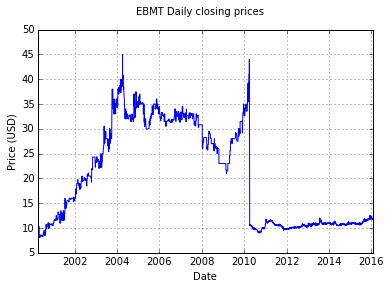

In [214]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#Here we plot the closing prices corresponding to t)he stock EBMT of Eagle Bancorp Montana Inc.

dates=[rawStocks[0][j][0]  for j in range(len(rawStocks[0]))]
prices=[rawStocks[0][j][1] for j in range(len(rawStocks[0]))]

fig = plt.figure()
plt.plot(dates,prices)
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.grid()
fig.suptitle(stock_name,"Daily closing prices")
plt.show()
#_ax.set_title(stock_name + " daily closing prices")
#_t = _ax.set_ylabel('Price (USD)')
plt.show()

### Time alignment for our data
Different types of instruments may trade on different days, or the data may have missing values for other reasons, so it is important to make sure that our different histories align. First, we need to trim all of our time series to the same region in time. Then, we need to fill in missing values. To deal with time series that have missing values at the start and end dates in the time region, we simply fill in those dates with nearby values in the time region.

<div class='anchor' ></div>

#### Question 4.4
Assume that we only focus on the data from 23/01/2009 to 23/01/2014. Write a function named `trimToRegion` to select only the records in that time interval. 

Requirements: after processing, each instrument $i$ has a list of records: $[r_0, r_2,...,r_{m_i}]$ such that $r_0$ and $r_{m_i}$ are assigned, respectively, the first and the last values corresponding to the extremes of the given time interval. For example: $r_0$ should contain the value at date 23/01/2009.

In [188]:
# note that the data of crude oild and treasury is only available starting from 26/01/2006 
start = datetime(year=2009, month=1, day=23)
end = datetime(year=2014, month=1, day=23)

def trimToRegion(history, start, end):
    def isInTimeRegion(entry):
        (date, value) = entry
        return date >= start and date <= end

    # only select entries which are in the time region
    trimmed = list(filter(isInTimeRegion, history))
    
    # if the data has incorrect time boundaries, add time boundaries
    if trimmed[0][0] != start:
        trimmed.insert(0, (start, trimmed[0][1]))
    if trimmed[-1][0] != end:
        trimmed.append((end, trimmed[-1][1]))
    return trimmed
    
# test our function
trimmedStock0  = trimToRegion(rawStocks[0], start, end)
# the first 5 records of stock 0
print(trimmedStock0[:5])
# the last 5 records of stock 0
print(trimmedStock0[-5:])

assert(trimmedStock0[0][0] == start), "the first record must contain the price in the first day of time interval"
assert(trimmedStock0[-1][0] == end), "the last record must contain the price in the last day of time interval"

[(datetime.datetime(2009, 1, 23, 0, 0), 22.999994), (datetime.datetime(2009, 1, 26, 0, 0), 22.999994), (datetime.datetime(2009, 1, 27, 0, 0), 22.999994), (datetime.datetime(2009, 1, 28, 0, 0), 22.999994), (datetime.datetime(2009, 1, 29, 0, 0), 22.999994)]
[(datetime.datetime(2014, 1, 16, 0, 0), 10.98), (datetime.datetime(2014, 1, 17, 0, 0), 10.98), (datetime.datetime(2014, 1, 21, 0, 0), 10.98), (datetime.datetime(2014, 1, 22, 0, 0), 10.98), (datetime.datetime(2014, 1, 23, 0, 0), 11.0)]


### Dealing with missing values
We expect that we have the price of instruments and factors **in each business day**. Unfortunately, there are many missing values in our data: this means that we miss data for some days, e.g. we have data for the monday of a certain week, but not for the subsequent tuesday. So, we need a function that helps filling these missing values.

Next, we provide to you the function to fill missing value: read it carefully!

In [189]:
def fillInHistory(history, start, end):
    curr = history
    filled = []
    idx = 0
    curDate = start
    numEntries = len(history)
    while curDate < end:
        
        # if the next entry is in the same day
        # move to the next entry
        while idx + 1 < numEntries and curr[idx + 1][0] <= curDate:
            idx +=1

        # only add the last value of instrument in a single day
        # check curDate is weekday or not
        # 0: Monday -> 5: Saturday, 6: Sunday
        if curDate.weekday() < 5:
            
            filled.append((curDate, curr[idx][1]))
            # move to the next business day
            curDate += timedelta(days=1)
        
        # skip the weekends
        if curDate.weekday() >= 5:
            # if curDate is Sat, skip 2 days, otherwise, skip 1 day
            curDate += timedelta(days=(7-curDate.weekday()))

    return filled

<div class='anchor' ></div>

#### Question 4.5
Trim data of stocks and factors into the given time interval.

In [190]:
#print rawStocks[0]

# trim into a specific time region
# and fill up the missing values
stocks = list(map(lambda stock: \
            fillInHistory(
                trimToRegion(stock, start, end), 
            start, end), 
        rawStocks))



# merge two factors, trim each factor into a time region
# and fill up the missing values
allfactors = factors1 + factors2
factors = list(map(lambda factor:
            fillInHistory(
                trimToRegion(factor, start, end), 
            start, end), 
            allfactors
            ))
            
# test our code
print("the first 5 records of stock 0:", stocks[0][:5], "\n")
print("the last 5 records of stock 0:", stocks[0][-5:], "\n")
print("the first 5 records of factor 0:", factors[0][:5], "\n")
print("the last 5 records of factor 0:", factors[0][-5:], "\n")

the first 5 records of stock 0: [(datetime.datetime(2009, 1, 23, 0, 0), 22.999994), (datetime.datetime(2009, 1, 26, 0, 0), 22.999994), (datetime.datetime(2009, 1, 27, 0, 0), 22.999994), (datetime.datetime(2009, 1, 28, 0, 0), 22.999994), (datetime.datetime(2009, 1, 29, 0, 0), 22.999994)] 

the last 5 records of stock 0: [(datetime.datetime(2014, 1, 16, 0, 0), 10.98), (datetime.datetime(2014, 1, 17, 0, 0), 10.98), (datetime.datetime(2014, 1, 20, 0, 0), 10.98), (datetime.datetime(2014, 1, 21, 0, 0), 10.98), (datetime.datetime(2014, 1, 22, 0, 0), 10.98)] 

the first 5 records of factor 0: [(datetime.datetime(2009, 1, 23, 0, 0), 46.47), (datetime.datetime(2009, 1, 26, 0, 0), 45.73), (datetime.datetime(2009, 1, 27, 0, 0), 41.58), (datetime.datetime(2009, 1, 28, 0, 0), 42.16), (datetime.datetime(2009, 1, 29, 0, 0), 41.44)] 

the last 5 records of factor 0: [(datetime.datetime(2014, 1, 16, 0, 0), 93.96), (datetime.datetime(2014, 1, 17, 0, 0), 94.37), (datetime.datetime(2014, 1, 20, 0, 0), 93.9

Recall that Value at Risk (VaR) deals with **losses over a particular time horizon**. We are not concerned with the absolute prices of instruments, but how those prices **change over** a given period of time. In our project, we will set that length to two weeks: we use the sliding window method to transform time series of prices into an overlapping sequence of price change over two-week intervals.

The figure below illustrate this process. The returns of market factors after each two-week intervals is calculated in the very same way.

![](https://dl.dropboxusercontent.com/s/r9ucsicichb6gjh/two-week-time-interval.svg)

In [191]:
def buildWindow(seq, k=2):
    "Returns a sliding window (of width k) over data from iterable data structures"
    "   s -> (s0,s1,...s[k-1]), (s1,s2,...,sk), ...                   "
    it = iter(seq)
    result = tuple(islice(it, k))
    if len(result) == k:
        yield result  
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [192]:
print(len(rawStocks))

25


<div class='anchor' ></div>

#### Question 4.6
Compute the returns of the stocks after each two week time window.

In [193]:
def calculateReturn(window):
    # return the change of value after two weeks
    return window[-1][1] - window[0][1]
def twoWeekReturns(history):
    # we use 10 instead of 14 to define the window
    # because financial data does not include weekends
    return [calculateReturn(entry) for entry in buildWindow(history, 10)]
stocksReturns = list(map(twoWeekReturns, stocks))
factorsReturns = list(map(twoWeekReturns, factors))

# test our functions
#print(factorsReturns[1][:5])
print("the first 5 returns of stock 0:", stocksReturns[0][:5])
print("the last 5 returns of stock 0:", stocksReturns[0][-5:])

the first 5 returns of stock 0: [0.0, 0.0, 0.0, 0.0, 0.0]
the last 5 returns of stock 0: [0.07000000000000028, 0.07000000000000028, 0.030000000000001137, -0.019999999999999574, 0.009999999999999787]


We can have a look at the histogram and the evolution of returns over time of stock 0 .

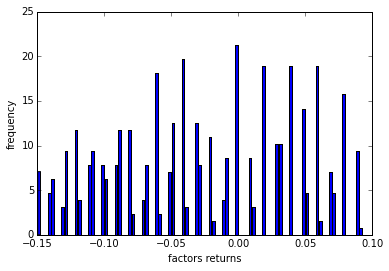

In [194]:
#ploting the histogram:
fig = plt.figure()
bins=np.arange(-0.15,0.10,0.0025)
plt.hist(stocksReturns[2], bins, normed=1, histtype='bar', rwidth=0.8)
plt.xlabel('factors returns')
plt.ylabel('frequency')


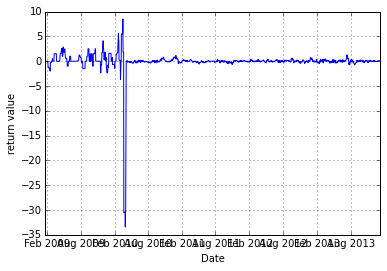

In [195]:
#ploting evolution in time 
dates=[stocks[0][j][0]  for j in range(len(stocks[0]))]
plt.plot(dates[:len(stocksReturns[0])],stocksReturns[0])
plt.ylabel('return value ')
plt.xlabel('Date')
#plt.xticks([2009,2010,2011,2012,2013])
plt.grid()
fig.suptitle("evolution of returns in time")
plt.show()
#_ax.set_title(stock_name + " daily closing prices")
#_t = _ax.set_ylabel('Price (USD)')
plt.show()

Alright! Now we have data that is properly aligned to start the training process: stocks' returns and factors' returns, per time windows of two weeks. Next, we will apply the MCS method.

## 5.5. Summary guidelines to apply the MCS method on the data we prepared
Next, we overview the steps that you have to follow to build a model of your data, and then use Monte Carlo simulations to produce output distributions:

- **Step 1**: Defining the relationship between the market factors and the instrument's returns. This relationship takes the form of a model fitted to historical data.
- **Step 2**: Defining the distributions for the market conditions (particularly, the returns of factors) that are straightforward to sample from. These distributions are fitted to historical data. 
- **Step 3**: Generate the data for each trial of a Monte Carlo run: this amount to generating the random values for market conditions along with these distributions.
- **Step 4**: For each trial, from the above values of market conditions, and using the relationship built in step 1, we calculate the return for each instrument and the total return. We use the returns to define an empirical distribution over losses. This means that, if we run 100 trials and want to estimate the 5% VaR, we would choose it as the loss from the trial with the fifth greatest loss.
- **Step 5**: Evaluating the result

## 5.6. Applying MCS

### Step 1: Defining relationship between market factors and instrument's returns

In our simulation, we will use a simple linear model. By our definition of return , a factor return is a **change** in the value of a market factor **over a particular time period**, e.g. if the value of the S&P 500 moves from 2000 to 2100 over a time interval, its return would be 100.

A vector that contains the return of 4 market factors is called a *market factor vector*. Generally, instead of using this vector as features, we derive a set of features from simple transformation of it. In particular, a vector of 4 values is tranformed into a vector of length $m$ by function $F$. In the simplest case $F(v) = v$.

Denote $v_t$ the market factor vector, and $f_t$ the transformed features of $v_t$ at time $t$.

$f_{tj}$ is the value of feature $j$ in $f_t$.

Denote $r_{it}$ the return of instrument $i$ at time $t$ and $c_i$ the [intercept term](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-the-constant-y-intercept) of instrument $i$.

We will use a simple linear function to calculate $r_{it}$ from $f_t$:

$$
r_{it} = c_i + \sum_{j=1}^{m}{w_{ij}*f_{tj}}
$$

where $w_{ij}$ is the weight of feature $j$ for instrument $i$.

All that above means that given a market factor vector, we have to "featurize it" and then use the result as a surrogate for calculating the return of the instruments, using the above linear function.

There are two questions that we should consider: **how to featurize a factor vector ?** and **how to pick values for $w_{ij}$?**

**How to featurize a factor vector ?**
In fact, the instruments' returns may be non-linear functions of the factor returns. So, we should not use factor returns as features in the the above linear function. Instead, we tranform them into a set of features with different size. In this Notebook, we can include some additional features in our model that we derive from non-linear transformations of the factor returns. We will try adding two more features for each factor return: its square and its square root values. So, we can still assume that our model is a linear model in the sense that the response variable is a linear function of the new features. *Note that the particular feature transformation described here is meant to be an illustrative example of some of the options that are available: it shouldn't be considered as the state of the art in predictive financial modeling!!*.

**How to pick values for $w_{ij}$ ?**

For all the market factor vectors in our historical data, we tranform them to feature vectors. Now, we have feature vectors in many two-week intervals and the corresponding instrument's returns in these interval. We can use Odinary Least Square (OLS) regression model to estimate the weights for each instrument such that our linear function can fit to the data. The parameters for OLS function are:

- `x`: The collection of columns where **each column** is the value of **a feature** in many two-week interval
- `y`: The return of an instrument in the corresponding time interval of x.

The figure below shows the basic idea of the process to build a statistial model for predicting the returns of stock X.

![](https://dl.dropboxusercontent.com/s/kbjtwmnr4w31uev/process-build-model3.svg)


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>

### Question 5
#### Question 5.1

Currently, our data is in form of:

$$
factorsReturns=
\begin{bmatrix}
 r_{00} & r_{01} & r_{02} & ... & r_{0k} \\
 r_{10} & r_{11} & r_{12} & ... & r_{1k} \\
 ... & ... & ... & ... & ... \\
 r_{n0} & r_{n1} & r_{n2} & ... & r_{nk}\\
\end{bmatrix}
$$


$$
stocksReturns=
\begin{bmatrix}
 s_{00} & s_{01} & s_{02} & ... & s_{0k} \\
 s_{10} & s_{11} & s_{12} & ... & s_{1k} \\
 ... & ... & ... & ... & ... \\
 s_{n0} & s_{n1} & s_{n2} & ... & s_{nk}\\
\end{bmatrix}
$$

Where, $r_{ij}$ is the return of factor $i^{th}$ in time window $j^{th}$, $k$ is the number of time windows, and $n$ is the number of factors. A similar definition goes for $s_{ij}$.

In order to use OLS, the parameter must be in form of:

$$
x=factorsReturns^T =
\begin{bmatrix}
 r_{00} & r_{10} & ... & r_{n0} \\
 r_{01} & r_{11} & ... & r_{n1} \\
 r_{02} & r_{12} & ... & r_{n2}\\
 ... & ... & ... & ... \\
 r_{0k} & r_{1k} & ... & r_{nk}\\
\end{bmatrix}
$$


Whereas, $y$ can be any row in `stocksReturns`.

So, we need a function to transpose a matrix. Write a function named `transpose` to do just that.

In [196]:
def transpose(matrix):
    m = np.matrix(matrix)
    return np.transpose(m).tolist()
    
# test function
assert (transpose([[1,2,3], [4,5,6], [7,8,9]]) == [[1, 4, 7], [2, 5, 8], [3, 6, 9]]), "Function transpose runs incorrectly"

<div class='anchor' ></div>

#### Question 5.2
Write a function named `featurize` that takes a list factor's returns $[x_1, x_2,...,x_k]$ and transform it into a new list of features $[u_1,u_2,..,u_k, v_1, v_2,..,v_k, x_1,x_2,...,x_k]$.

Where 

$u_i$ = $\left\{
	\begin{array}{ll}
		x_i^2 & \mbox{if } x_i \geq 0 \\
		-x_i^2 & \mbox{if } x_i < 0
	\end{array}
\right.
$

and

$v_i$ = $\left\{
	\begin{array}{ll}
		\sqrt{x_i} & \mbox{if } x_i \geq 0 \\
		-\sqrt{x_i} & \mbox{if } x_i < 0
	\end{array}
\right.
$

In [197]:
def featurize(factorReturns):
    squaredReturns = [(x ** 2) if x > 0 else -(x ** 2) for x in factorReturns]
    squareRootedReturns = [np.sqrt(x) if x >= 0 else -np.sqrt(-x) for x in factorReturns]
    # concat new features
    return squaredReturns + squareRootedReturns + factorReturns

# test our function
assert (featurize([4, -9, 25]) == [16, -81, 625, 2, -3, 5, 4, -9, 25]), "Function runs incorrectly"

<div class='anchor' ></div>

#### Question 5.3
Using OLS, estimate the weights for each feature on each stock. What is the shape of `weights` (size of each dimension) ? Explain it.

In [216]:
def estimateParams(y, x):
    return sm.OLS(y, x).fit().params

# transpose factorsReturns
factorMat = transpose(factorsReturns)

# featurize each row of factorMat
factorFeatures = list(map(featurize, factorMat))

# OLS require parameter is a numpy array
factor_columns = np.array(factorFeatures)

#add a constant - the intercept term for each instrument i.
factor_columns = sm.add_constant(factor_columns, prepend=True)

# estimate weights
weights = [estimateParams(stocksReturn, factor_columns) for stocksReturn in stocksReturns]

print("shape of the weights:  "+str(len(weights))+"x"+str((len(weights[0]))))

print("weights:", weights)

shape of the weights:  25x13
weights: [array([ -2.01260717e-02,  -9.34594331e-04,   2.79964946e+00,
         2.22138943e-04,  -5.51345938e-05,  -2.49808990e-01,
         1.40434534e+00,  -2.22685753e-02,  -5.89784238e-02,
         7.65465189e-02,  -2.68833305e+00,  -6.20633983e-03,
         1.06396735e-02]), array([ -4.89143853e-02,  -1.13046416e-03,   1.14692522e+00,
        -1.67179970e-05,   6.90988458e-06,   2.24600516e-02,
         2.73394474e-01,   1.86203768e-02,  -9.94854168e-03,
         9.95218902e-03,  -7.26481976e-01,   2.23624788e-03,
         2.30068591e-03]), array([  2.06578219e-02,   1.76008302e-03,   1.04757832e+00,
        -9.21042332e-07,   2.22069579e-06,  -9.50770429e-04,
         2.15329132e-01,  -4.64951727e-03,   1.31041045e-02,
        -9.06447668e-03,  -7.32717333e-01,  -7.92423049e-04,
        -1.81786009e-04]), array([ -1.74971872e-01,  -3.12077643e-02,  -3.23002727e+00,
        -5.39363209e-05,   5.60559410e-05,  -5.14792045e-01,
        -1.38957733e-01,  

<div class="answer">

In fact from the formula defined in step one can we can see that the shape of the weights should be : length_of_instruments x length_of_factor. length_of_instruments is 25  which is the number of stocks left after we filtered the data to have more than 5 years of records. and the length_of_factor was 4 , after featurizing it is  3*4=12 , plus the intercept term we prepended. 

</div>

### Step 2: Defining the distributions for the market conditions
Since we can not define the ditributions for the market factors directly, we can only approximate their distribution.
The best way to do that, is plotting their value. Howevery, these values may fluctuate quite a lot. 

Next, we show how to use the Kernel density estimation (KDE) technique to approximate such distributions. In brief, kernel density estimation is a way of smoothing out a histogram: this is achieved by assigning (or centering) a probability distribution (usually a normal distribution) to each data point, and then summing. So a set of two-week-return samples would result in a large number of "super-imposed" normal distributions, each with a different mean. 

To estimate the probability density at a given point, KDE evaluates the PDFs of all the normal distributions at that point and takes their average. The smoothness of a kernel density plot depends on its *bandwidth*, and the standard deviation of each of the normal distributions. For a brief introduction on KDE, please refer to this [link](https://en.wikipedia.org/wiki/Kernel_density_estimation).

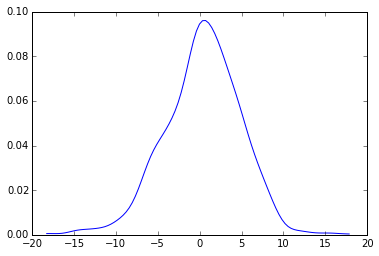

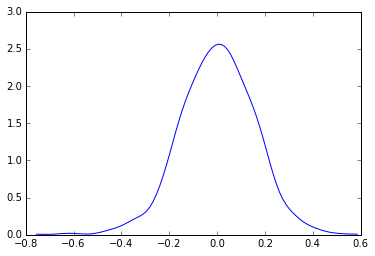

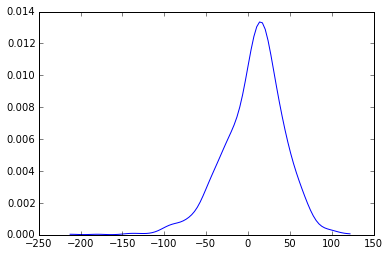

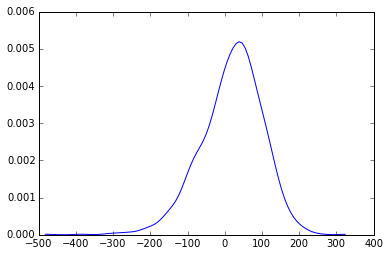

In [199]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.pyplot as plt
import scipy

def plotDistribution(samples):
    vmin = min(samples)
    vmax = max(samples)
    stddev = np.std(samples)
    
    domain = np.arange(vmin, vmax, (vmax-vmin)/100)
    
    # a simple heuristic to select bandwidth
    bandwidth = 1.06 * stddev * pow(len(samples), -.2)
    
    # estimate density
    kde = KDEUnivariate(samples)
    kde.fit(bw=bandwidth)
    density = kde.evaluate(domain)
    
    # plot
    plt.plot(domain, density)
    plt.show()

plotDistribution(factorsReturns[0])
plotDistribution(factorsReturns[1])
plotDistribution(factorsReturns[2])
plotDistribution(factorsReturns[3])

For the sake of simplicity, we can say that our smoothed versions of the returns of each factor can be represented quite well by a a normal distribution. Of course, more exotic distributions, perhaps with fatter tails, could fit more closely the data, but it is outside the scope of this Notebook to proceed in this way.

Now, the simplest way to sample factors returns is to use a normal distribution for each of the factors, and sample from these distributions independently. However, this approach ignores the fact that market factors are often correlated. For example, when the price of crude oil is down, the price of treasury bonds is down too. We can check our data to verify about the correlation.

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>

### Question 6

#### Question 6.1
Calculate the correlation between market factors and explain the result.

HINT: function `np.corrcoef` might be useful.

In [200]:
'''
comb = [[x, y] for x in range(4) for y in range(4) if x != y]

for x, y in comb:
    correlation = np.corrcoef(factorsReturns[x], factorsReturns[y])
    print('Correlation between', x, 'and', y, ':')
    print(correlation)
    print()
'''

correlation = np.corrcoef([factorsReturns[i] for i in range(len(factorsReturns))])
print('General correlation: ')
print(correlation)

General correlation: 
[[ 1.          0.38507954  0.47411609  0.45841194]
 [ 0.38507954  1.          0.55213086  0.54918324]
 [ 0.47411609  0.55213086  1.          0.95227596]
 [ 0.45841194  0.54918324  0.95227596  1.        ]]


<div class="comment">

PUT YOUR COMMENT HERE

</div>



The multivariate normal distribution can help here by taking the correlation information between the factors into account. Each sample from a multivariate normal distribution can be thought of as a vector. Given values for all of the dimensions but one, the distribution of values along that dimension is normal. But, in their joint distribution, the variables are not independent.

For this use case, we can write:

$$
\left(\begin{array}{c}f_{1}\\f_{2}\\f_{3}\\f_{4} \end{array}\right)
\sim N 
\left[
  \left(
    \begin{array}{c}
      \mu_1\\ \mu_2 \\ \mu_3 \\ \mu_4 
    \end{array}
  \right), 
  \left(
    \begin{array}{cccc}
      \sigma^2_1 & \rho_{12} \sigma_1\sigma_2 & \rho_{13} \sigma_1\sigma_3 & \rho_{14} \sigma_1\sigma_4 \\ 
      \rho_{12}\sigma_2\sigma_1 & \sigma^2_2 & \rho_{23} \sigma_2\sigma_3 & \rho_{24} \sigma_2\sigma_4\\
      \rho_{13} \sigma_3\sigma_1 & \rho_{23} \sigma_3\sigma_2 & \sigma^2_3 & \rho_{34} \sigma_3\sigma_4 \\ 
      \rho_{14} \sigma_4\sigma_1 & \rho_{24} \sigma_4\sigma_2 & \rho_{34} \sigma_3\sigma_4 & \sigma_4^2 \\ 
    \end{array}
  \right)
\right]
$$

Or,

$$
f_t \sim N(\mu, \sum)
$$

Where $f_1$, $f_2$, $f_3$ and $f_4$ are the market factors, $\sigma_i$ is the standard deviation of factor $i$, $\mu$ is a vector of the empirical means of the returns of the factors and $\sum$ is the empirical covarance matrix of the returns of the factors.

The multivariate normal is parameterized with a mean along each dimension and a matrix describing the covariance between each pair of dimensions. When the covariance matrix is diagonal, the multivariate normal reduces to sampling along each dimension independently, but placing non-zero values in the off-diagonals helps capture the relationships between variables. Whenever having the mean of this multivariate normal distribution and it's covariance matrix, we can generate the sample values for market factors.

Next, we will calculate the mean and the covariance matrix of this multivariate normal distribution from the historical data.


<div class='anchor' ></div>

#### Question 6.2
Calculate the covariance matrix $\sum$ and the means $\mu$ of factors' returns then generate a random vector of factors return that follows a multivariate normal distribution $\sim N(\mu, \sum)$

HINT:
Function `np.cov` can help calculating covariance matrix. Function `np.random.multivariate_normal(<mean>, <cov>)` is often used for generating samples.

In [201]:
factorCov = np.cov([factorsReturns[0], factorsReturns[1], factorsReturns[2], factorsReturns[3]])
factorMeans = [sum(factorsReturns[i])/len(factorsReturns[i]) for i in range(4)]
sample = np.random.multivariate_normal(factorMeans, factorCov)
print('factorCov:')
print(factorCov)
print()
print('factorMeans:')
print(factorMeans)
print()
print('sample:')
print(sample)

factorCov:
[[  2.03712313e+01   2.70383097e-01   7.77281497e+01   1.72733934e+02]
 [  2.70383097e-01   2.42014227e-02   3.11994882e+00   7.13264857e+00]
 [  7.77281497e+01   3.11994882e+00   1.31938031e+03   2.88775882e+03]
 [  1.72733934e+02   7.13264857e+00   2.88775882e+03   6.96989443e+03]]

factorMeans:
[0.35908880308880364, 0.0019722007722007863, 6.953868592277998, 18.7092272903475]

sample:
[ 2.81032691 -0.15388182 -1.63457217  4.55127327]


### Step 3&4: Generating samples, running simulation and calculating the VaR

We define some functions that helps us calculating VaR 5%. You will see that the functions below are pretty complicated! This is why we provide a solution for you: however, study them well!!

The basic idea of calculating VaR 5% is that we need to find a value such that only 5% of the losses are bigger than it. That means the 5th percentile of the losses should be VaR 5%.

VaR can sometimes be problematic though, since it does give any information on the extent of the losses which can exceed the VaR estimate. CVar is an extension of VaR that is introduced to deal with this problem. Indeed, CVaR measures the expected value of the loss in those cases where VaR estimate has been exceeded.

In [202]:
def fivePercentVaR(trials):
    numTrials = trials.count()
    topLosses = trials.takeOrdered(max(round(numTrials/20.0), 1))
    return topLosses[-1]

# an extension of VaR
def fivePercentCVaR(trials):
    numTrials = trials.count()
    topLosses = trials.takeOrdered(max(round(numTrials/20.0), 1))
    return sum(topLosses)/len(topLosses)

def bootstrappedConfidenceInterval(
      trials, computeStatisticFunction,
      numResamples, pValue):
    stats = []
    for i in range(0, numResamples):
        resample = trials.sample(True, 1.0)
        stats.append(computeStatisticFunction(resample))
    sorted(stats)
    lowerIndex = int(numResamples * pValue / 2 - 1)
    upperIndex = int(np.ceil(numResamples * (1 - pValue / 2)))
    return (stats[lowerIndex], stats[upperIndex])

Next, we will run the Monte Carlo simulation 10,000 times, in parallel using Spark. Since your cluster has 12 cores (two Spark worker nodes, each with 6 cores), we can set `parallelism = 12` to dispatch simulation on these cores, across the two machines (remember, those are not really "physical machines", they are Docker containers running in our infrastructure).

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>

### Question 7
Complete the code below to define the simulation process and calculate VaR 5%.

In [203]:
# RUN SILMULATION
def simulateTrialReturns(numTrials, factorMeans, factorCov, weights):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns
        trialFactorReturns = np.random.multivariate_normal(factorMeans, factorCov)
        
        # featurize the factors' returns
        trialFeatures = featurize(trialFactorReturns.tolist())
        
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        
        trialTotalReturn = 0
        
        # calculate the return of each instrument
        # then calulate the total of return for this trial features  !!!! sum
        trialTotalReturn = np.dot(weights,trialFeatures).sum()
        
        trialReturns.append(trialTotalReturn)
    return trialReturns
#### no idx.
parallelism = 12
numTrials = 10000
trial_indexes = list(range(0, parallelism))
seedRDD = sc.parallelize(trial_indexes, parallelism)
bFactorWeights = sc.broadcast(weights)

trials = seedRDD.flatMap(lambda idx: \
                simulateTrialReturns(
                    max(int(numTrials/parallelism), 1), 
                    factorMeans, factorCov,
                    bFactorWeights.value
                ))
trials.cache()

valueAtRisk = fivePercentVaR(trials)
conditionalValueAtRisk = fivePercentCVaR(trials)

print("Value at Risk(VaR) 5%:", valueAtRisk)
print("Conditional Value at Risk(CVaR) 5%:", conditionalValueAtRisk)

Value at Risk(VaR) 5%: -19.0186098147
Conditional Value at Risk(CVaR) 5%: -24.3478947367


The value of VaR depends on how many invested stocks and the chosen distribution of random variables. Assume that we get VaR 5% = -2.66,  that means that there is a 0.05 probability that the portfolio will fall in value by more than \$2.66 over a two weeks period if there is no trading. In other words, the loses are less than \$2.66 over two weeks period with 95% confidence level. When a loss over two weeks is more than \$2.66, we call it **failure** (or **exception**). Informally, because of 5% probability, we expect that there are only $0.05*W$ failures out of total $W$ windows.

### Step 5: Evaluating the results using backtesting method
In general, the error in a Monte Carlo simulation should be proportional to 1/sqrt(n), where n is the number of trials. This means, for example, that quadrupling the number of trials should approximately cut the error in half. A good way to check the quality of a result is backtesting on historical data. Backtesting is a statistical procedure where actual losses are compared to the estimated VaR. For instance, if the confidence level used to calculate VaR is 95% (or VaR 5%), we expect only 5 failures over 100 two-week time windows.

The most common test of a VaR model is counting the number of VaR failures, i.e, in how many windows, the losses exceed VaR estimate. If the number of exceptions is less than selected confidence level would indicate, the VaR model overestimates the risk. On the contrary, if there are too many exceptions, the risk is underestimated. However, it's very hard to observe the amount of failures suggested by the confidence level exactly. Therefore, people try to study whether the number of failures is reasonable or not, or will the model be accepted or rejected.

One common test is Kupiec's proportion-of-failures (POF) test. This test considers how the portfolio performed at many historical time intervals and counts the number of times that the losses exceeded the VaR. The null hypothesis is that the VaR is reasonable, and a sufficiently extreme test statistic means that the VaR estimate does not accurately describe the data. The test statistic is computed as:

$$
-2ln\Bigg(\frac{(1-p)^{T-x}p^x}{(1-\frac{x}{T})^{T-x}(\frac{x}{T})^x}\Bigg)
$$

where:

$p$ is the quantile-of-loss of the VaR calculation (e.g, in VaR 5%, p=0.05),

$x$ (the number of failures) is the number of historical intervals over which the losses exceeded the VaR 

$T$ is  the total number of historical intervals considered

Or we can expand out the log for better numerical stability:

$$
\begin{equation}
-2\Big((T-x)ln(1-p)+x*ln(p)-(T-x)ln(1-\frac{x}{T})-x*ln(\frac{x}{T})\Big)
\end{equation}
$$

If we assume the null hypothesis that the VaR is reasonable, then this test statistic is drawn from a chi-squared distribution with a single degree of freedom. By using Chi-squared distribution, we can find the `p-value` accompanying our test statistic value.  If `p-value` exceeds the critical value of the Chi-squared distribution, we do have sufficient evidence to reject the null hypothesis that the model is reasonable. Or we can say, in that case, the model is considered as inaccurate.

For example, assume that we calculate VaR 5% (the confidence level of the VaR model is 95%) and get value VaR = 2.26. We also observed 50 exceptions over 500 time windows. Using the formular above, the test statistic `p-value` is calculated and equal to `8.08`. Compared to `3.84`, the critical value of Chi-squared distribution with one degree of freedom at probability 5%, the test statistic is larger. So, the model is rejected. The critical values of Chi-squared can be found by following [this link](https://people.richland.edu/james/lecture/m170/tbl-chi.html).
However, in this Notebook, it's not a good idea to find the corresponding critical value by looking in a "messy" table, especially when we need to change the confidence level. Insteads, from `p-value`, we will calculate the probability of the test statistic in Chi-square thanks to some functions in package `scipy`. If the calculated probability is smaller than the quantile of loss (e.g, 0.05), the model is rejected and vice versa.


![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>
### Question 8

#### Question 8.1
Write a function to calculate the number of failures, that is when the losses (in the original data) exceed the VaR.

HINT:
- First, we need to calculate the total loss in each 2-week time interval
- If the total loss of a time interval exceeds VaR, then we say that our VaR fails to estimate the risk in that time interval.
- Return the number of failures

NOTE: The loss is often has negative value, so, be careful when compare it to VaR.

In [207]:
from scipy import stats
import math
print(len(stocksReturns))
def countFailures(stocksReturns, valueAtRisk):
    failures = 0
    # iterate over time intervals
    for i in range(0, len(stocksReturns[0])):                        
        # calculate the losses in each time interval
         ##### changed ##########
        loss=sum([stocks[i] for stocks in stocksReturns])           
        # if the loss exceeds VaR
        if loss < valueAtRisk:
            failures += 1
    return failures

25


<div class='anchor' ></div>

#### Question 8.2
Write a function named `kupiecTestStatistic` to calculate the test statistic which was described in the above equation.

In [208]:
def kupiecTestStatistic(total, failures, confidenceLevel):
    failureRatio = failures/total
    logNumer = (total - failures) * math.log(1 - confidenceLevel) + failures * math.log(confidenceLevel)
    logDenom = (total - failures) * math.log(1 - failureRatio) + failures * math.log(failureRatio)
    return -2 * (logNumer - logDenom)    
# test the function
assert (round(kupiecTestStatistic(250, 36, 0.1), 2) == 4.80), "function kupiecTestStatistic runs incorrectly"

Now we can find the p-value accompanying our test statistic value.

In [212]:
def kupiecTestPValue(stocksReturns, valueAtRisk, confidenceLevel):
    failures = countFailures(stocksReturns, valueAtRisk)
    print("num failures:", failures, "/", len(stocksReturns[0]))
    if failures == 0:
        # the model is very good
        return 1
    total = len(stocksReturns[0])
    testStatistic = kupiecTestStatistic(total, failures, confidenceLevel)
    #return 1 - stats.chi2.cdf(testStatistic, 1.0)
    return stats.chisqprob(testStatistic, 1.0)

varConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentVaR, 100, 0.05)
cvarConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentCVaR, 100, .05)
print("VaR confidence interval: " , varConfidenceInterval)
print("CVaR confidence interval: " , cvarConfidenceInterval)
print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, valueAtRisk, 0.05))

VaR confidence interval:  (-18.898732891192935, -19.084019656236347)
CVaR confidence interval:  (-24.364844787637356, -23.89322553033249)
num failures: 103 / 1295
Kupiec test p-value:  6.53074567541e-06


<div class='anchor' ></div>
#### Question 8.3
Discuss the results you have obtained

<div class="answer">

the model is rejected , based on the kupiec test because it is smaller than the quantile but also because we have a 103/1295 failiure , when we were expecting a 5%.

</div>

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>
### Question 9

Assume that we invest in more than 100 stocks. Use the same market factors as for the previous questions to estimate VaR by running MCS, then validate your result.

What is the main observation you have, once you answer this question? When you plan to invest in more instruments, how is your ability to predict the risk going to be affected?


In [217]:
# select path of all stock data files in "stock_folder"
files = [join(stock_folder, f) for f in listdir(stock_folder) if isfile(join(stock_folder, f))]

# assume that we invest the first 500 stocks
#print(len(files), 'stocks available')
files_invest = files[:500]

# read each line in each file, convert it into the format: (date, value)
rawStocks = [process_stock_file(f) for f in files_invest]
# select only instruments which have more than 5 years of history
rawStocks = list(filter(lambda instrument: len(instrument)>=5*260, rawStocks))
print(len(rawStocks), 'stocks available')

stocks = list(map(lambda stock: \
            fillInHistory(
                trimToRegion(stock, start, end), 
            start, end), 
        rawStocks))

394 stocks available


In [219]:
stocksReturns = list(map(twoWeekReturns, stocks))
weights = [estimateParams(stocksReturn, factor_columns) for stocksReturn in stocksReturns]

In [220]:
parallelism = 12
numTrials = 10000
trial_indexes = list(range(0, parallelism))
seedRDD = sc.parallelize(trial_indexes, parallelism)
bFactorWeights = sc.broadcast(weights)

trials = seedRDD.flatMap(lambda idx: \
                simulateTrialReturns(
                    max(int(numTrials/parallelism), 1), 
                    factorMeans, factorCov,
                    bFactorWeights.value
                ))
trials.cache()

valueAtRisk = fivePercentVaR(trials)
conditionalValueAtRisk = fivePercentCVaR(trials)

print("Value at Risk(VaR) 5%:", valueAtRisk)
print("Conditional Value at Risk(CVaR) 5%:", conditionalValueAtRisk)

Value at Risk(VaR) 5%: -281.667666442
Conditional Value at Risk(CVaR) 5%: -367.084067482


In [221]:
stocksReturns = list(map(twoWeekReturns, stocks))
varConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentVaR, 100, 0.05)
cvarConfidenceInterval = bootstrappedConfidenceInterval(trials, fivePercentCVaR, 100, .05)
print("VaR confidence interval: " , varConfidenceInterval)
print("CVaR confidence interval: " , cvarConfidenceInterval)
print("Kupiec test p-value: " , kupiecTestPValue(stocksReturns, valueAtRisk, 0.05))

VaR confidence interval:  (-281.66766644205404, -281.1236036607923)
CVaR confidence interval:  (-363.649872856233, -366.30900744975645)
num failures: 92 / 1295
Kupiec test p-value:  0.00104901548216


<div class="answer">

PUT YOUR ANSWER HERE !

</div>

![](https://farm2.staticflickr.com/1604/24934700445_833f0a5649_t.jpg)

<div class='anchor' ></div>
### Question 10

In the previous questions, we used the normal distributions to sample the factors returns.

Try to study how results vary when selecting other probability distributions: our goal is to improve the result of our MCS.

Here we use log-normal distributions to sample the factor returns: http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html#numpy.random.lognormal, instead of the covariance matrix we need the standart deviation matrix to compute the samples.

Distribution fitting: Next we try to plot distributions that may be accurate for our data and compare them to the distributions we inferred from the KDE technique.
our candidates are probability distributions must be defined over entire real axis , they can be bounded or unbounded: logistic distribution. students t distribution , we use maximum likelihood to decide which one to choose. lets look at the skewness of our data

In [222]:
print('skewness of facorsReturns[0]',scipy.stats.skew(factorsReturns[0]))
print('skewness of facorsReturns[1]',scipy.stats.skew(factorsReturns[1]))
print('skewness of facorsReturns[2]',scipy.stats.skew(factorsReturns[2]))
print('skewness of facorsReturns[3]',scipy.stats.skew(factorsReturns[3]))

skewness of facorsReturns[0] -0.3090808597352731
skewness of facorsReturns[1] -0.21072705708230788
skewness of facorsReturns[2] -0.7391064932634629
skewness of facorsReturns[3] -0.6533835923511565


Here we propose to use a t_student distribution because the population distribution is moderately skewed and close to normal. it is not implemented in numpy stats modules.

In [234]:
# Defining a function to sample from  a multivariate t_student distribution:

def multivariate_t(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution

    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))

    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

In [235]:
def simulateTrialReturns_student(numTrials, factorMeans, factorDev, weights):
    trialReturns = []
    for i in range(0, numTrials):
        # generate sample of factors' returns  we use 4 degrees of freedom.
        trialFactorReturns = multivariate_t(factorMeans,factorDev,4,len(factorMeans))
        
        # featurize the factors' returns
        trialFeatures = featurize(trialFactorReturns.tolist())
        
        # insert weight for intercept term
        trialFeatures.insert(0,1)
        
        trialTotalReturn = 0
        
        # calculate the return of each instrument
        # then calulate the total of return for this trial features
        trialTotalReturn = np.dot(trialFeatures, transpose(weights))
        
        trialReturns.append(trialTotalReturn)
    return trialReturns

In [236]:
trials = seedRDD.flatMap(lambda idx: \
                simulateTrialReturns_student(
                    max(int(numTrials/parallelism), 1), 
                    factorMeans, factorDev,
                    bFactorWeights.value
                ))
trials.cache()
valueAtRisk = fivePercentVaR(trials)
conditionalValueAtRisk = fivePercentCVaR(trials)
print("Value at Risk(VaR) 5%:", valueAtRisk)
print("Conditional Value at Risk(CVaR) 5%:", conditionalValueAtRisk)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2831.0 failed 4 times, most recent failure: Lost task 0.3 in stage 2831.0 (TID 34237, spark-worker1-aml-lab-group16-prod-zoe.group16-prod-zoe): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-236-344d8dcd636e>", line 4, in <lambda>
  File "<ipython-input-235-fd5afa75df32>", line 5, in simulateTrialReturns_student
  File "<ipython-input-234-86406501b754>", line 29, in multivariate_t
  File "mtrand.pyx", line 4361, in mtrand.RandomState.multivariate_normal (numpy/random/mtrand/mtrand.c:28359)
ValueError: cov must be 2 dimensional and square

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:300)
	at org.apache.spark.CacheManager.getOrCompute(CacheManager.scala:69)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:262)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:300)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:88)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1283)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1271)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1270)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1270)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:697)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:697)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:697)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1496)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1458)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1447)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:567)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1824)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1837)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1850)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1921)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:909)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:147)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:108)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:310)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:908)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor37.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-236-344d8dcd636e>", line 4, in <lambda>
  File "<ipython-input-235-fd5afa75df32>", line 5, in simulateTrialReturns_student
  File "<ipython-input-234-86406501b754>", line 29, in multivariate_t
  File "mtrand.pyx", line 4361, in mtrand.RandomState.multivariate_normal (numpy/random/mtrand/mtrand.c:28359)
ValueError: cov must be 2 dimensional and square

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:300)
	at org.apache.spark.CacheManager.getOrCompute(CacheManager.scala:69)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:262)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:300)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:88)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


## Going further

<b>Important note: As this part needed some extra libraries to run, we add the code here without running it. Our results can be found in the separate html file.<b>

Now, let's go further by grabbing more information about a given company.
We think it will be a good idea to grab the similar companies to a given one and the headlines of the articles on this given company as well. This can be done thanks to the http://finance.yahoo.com/ website which displays this information for each company.
Let's first start by defining a class, Yahoo_Finance_Scraper, to handle the retrieval of the information.

In [ ]:
from datetime import date, timedelta
from urllib import urlencode, urlopen
from urlparse import urlparse, urlunparse, parse_qs
from bs4 import BeautifulSoup
import urllib2
import json

from pprint import pprint

class Yahoo_Finance_Scraper():
    def __init__(self, symbol):
        self.yahooFinanceLink = 'http://finance.yahoo.com'
        self.symbol = symbol
    
    def getSource(self, html):
        return BeautifulSoup(html)
    
    def getRelatedCompanies(self):
        url = self.getCompanyUrl()
        html = urllib2.urlopen(url).read()
        bsPage = self.getSource(html)
        return self.getRelatedCompaniesFrom(bsPage)
        
    def getCompanyUrl(self):
        return self.yahooFinanceLink + '/q?s=' + self.symbol

    def getRelatedCompaniesFrom(self, bsPage):
        companies = []
        rows = bsPage.find(id='yfi_comparison').table.tbody.find_all('tr')
        
        for row in rows[1:]: # The first one is the current one
            companies.append(row.td.a.string)
        return companies

    def getArticles(self, from_, to_=None):
        if to_ == None:
            return self.getArticlesFromUrl(self.getArticlesPageUrlOf(from_))

        from_year, from_month, from_day = from_.split('-')
        to_year, to_month, to_day = to_.split('-')

        fdate = date(int(from_year), int(from_month), int(from_day))
        tdate = date(int(to_year), int(to_month), int(to_day))

        if(fdate > tdate):
            raise ValueError('To date is older than the from date')

        articles = []
        for i in range((tdate - fdate).days):
            articles += self.getArticlesFromUrl(self.getArticlesPageUrlOf(self.formatDate(fdate)))
            fdate += timedelta(days=1)

        return articles + self.getArticlesFromUrl(self.getArticlesPageUrlOf(to_))

    def formatDate(self, date):
        return date.isoformat()

    def getArticlesPageUrlOf(self, isoformatedDate=None):
        if isoformatedDate:
            return self.yahooFinanceLink + '/q/h?s=' + self.symbol + '&t=' + isoformatedDate
        return self.yahooFinanceLink + '/q/h?s=' + self.symbol + '&t=' + date.today().isoformat()

    def getArticlesFromUrl(self, url):
        query = dict(parse_qs(urlparse(url).query))
        months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
                  'September', 'October', 'November', 'December']
        
        html = urllib2.urlopen(url).read()
        bsPage = self.getSource(html)

        articles = [] # Tuples with date and list of titles and links
        
        content = bsPage.find(id='yfncsumtab').find_all('div', class_='yfi_quote_headline')[0]
        dates = content.find_all('h3')
        links = content.find_all('ul')[1:]

        for i in range(len(dates)):
            weekday, monthAndDay, year = dates[i].span.string.split(', ')
            month, day = monthAndDay.split()
            monthIx = months.index(month) + 1
            d = self.formatDate(date(int(year), monthIx, int(day)))
            
            if d == query['t'][0]: # We only want the articles for the given date
                headlines = links[i].find_all('li')
                hdls = []
                
                for headline in headlines:
                    text = headline.a.string
                    href = headline.a['href']
                    hdls.append((text, href))
                articles.append((d, hdls))
                break
            
        return articles # size 1

Good, now let's try it out to see if everything is working fine.

In [ ]:
scraper = Yahoo_Finance_Scraper('FB')
similarCompanies = scraper.getRelatedCompanies()
print 'Similar companies:', ", ".join(similarCompanies)
print ''

date_begin, date_end = '2016-01-22', '2016-03-22'
articles = scraper.getArticles(date_begin, date_end)
print 'Headlines:'
pprint(articles[:2])

Let's define a couple of functions in order to know if a given day is a work day or not (useful as the stock markets is closed during weekends), the change rate of a stock over a period of time (can be a day for example: value at opening and closing) and finally to serialize and unserialize a given object to save it for fruther analysis.

In [ ]:
def isWorkDay(dt):
    year, month, day = dt.split('-')
    d = date(int(year), int(month), int(day))
    if d.weekday() < 5:
        return True
    return False

def chgOver(begin, end):
    return (end - begin) / begin

def saveData(data, f):
    with open(f, 'w') as out:
        json.dump(data, out)
    
def retrieveData(f):
    with open(f) as data:    
        return json.load(data)

Let's use the saveData function defined above to save the article headlines we just retrieved.

In [ ]:
saveData(articles, 'articles_2016-01-22_2016-03-22.json')

### Correlation between similar companies

Let's have the look to the correlation between the variation of the stock values of similar companies. To retrieve the stock values we are interested in, we use yahoo_fiance, a python module to get stock data from Yahoo! Finance (https://github.com/lukaszbanasiak/yahoo-finance).

In [ ]:
from yahoo_finance import Share

def getClosingValues(symbol, date_begin, date_end):
    company = Share(symbol)
    # We retrieve the stock values for the period we are interested in
    stocks = list(reversed(company.get_historical(date_begin, date_end)))
    return [float(x['Adj_Close']) for x in stocks]

def getStocksFor(symbol, similarCompanies, date_begin, date_end):
    stocks = []
    stocks.append(getClosingValues(symbol, date_begin, date_end))
    for sC in similarCompanies:
        stocks.append(getClosingValues(sC, date_begin, date_end))
    return stocks
    
stocks = getStocksFor('FB', similarCompanies, date_begin, date_end)

In [ ]:
import numpy as np
print 'FB,', ", ".join(similarCompanies)
print numpy.corrcoef(stocks)

Thanks to this correlation matrix we see that the Facebook stock variations are closer to the ones of Microsoft that the ones of Twitter, which is not obvious at the first sight. Therefore it could be interesting to follow the variations in the Microsoft stock values if we are interested in the Facebook ones.

### Analysis of the impact of the headlines on the variation of the stock values

Now let's perform some analysis over the headlines that we previously retrieved. We are interested in analysing the impact of headlines on related stock value in the 3 days following their publication.

<b>Note</b>: We think that a retrieval of the completed articles would be more efficient than just analyzing the headlines, however as each website doesn't have the same structure it is difficult to build an efficient scraper that will get only the content we are intersting in and discard the related articles or content displayed on the website. Rather that building a different scraper for each website we think that a smarter approach will be to implement a website able to understand the structure of a web page based of visual clues. A description of such system can be found here: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.85.3169&rep=rep1&type=pdf [Extracting Content Structure for Web Pages based on Visual Representation].

First, let's define a function that stack all the headlines for each day in order to have a paragraph by work day (by convenience we stack the headlines of the weekend with the following Monday).

Like that we can modelise our training and test sets as follow: by work day we have a paragraph and the corresponding variation of the stock value for a given window of time (the one given by the chgOver function).

In [ ]:
def stackHeadlines(articles):
    stack = []
    text = ""
    for d, headlines in articles:
        if isWorkDay(d):
            stack.append((d, ". ".join([headline[0] for headline in headlines]) + text))
            text = ""
        else:
            text += ". " + ". ".join([headline[0] for headline in headlines])
    return stack

def buildSet(stack, closings, window):
    stockSet = []
    i = 0
    for d, paragraph in stack:
        stockSet.append((d, paragraph, chgOver(closings[i], closings[i + window])))
        i += 1
        if i + window >= len(closings): # Our data set will be 'window' length shorter than the original dataset
            break          
    return stockSet

closings = stocks[0]

# And now the can build on training and test sets
stack = stackHeadlines(articles)
stockSet = buildSet(stack, closings, 3)

# We display a part of it to see the result
print 'Dataset length:', len(stockSet)
pprint(stockSet[2:5])

Now we will be put in place our approach to predict variation (for the window of time that we previously defined) given a paragraph of headlines. 
We will first convert every paragraph into a vector thanks to the Gensim python library (https://radimrehurek.com/gensim/index.html) after removing the stop words and stem them thanks to the Natural Language Toolkit: http://www.nltk.org/.

<b>Note</b>: GloVe, Global Vectors for Word Representation, is an unsupervised learning algorithm wich can be used as well for obtaining vector representations for words (http://nlp.stanford.edu/projects/glove/).

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from gensim import corpora, models, similarities

def filterStockSet(stockSet):
    # We assume that the paragraph is in english
    stemmer = SnowballStemmer("english")
    stop_words = set(stopwords.words('english'))
    def filterParagraph(paragraph):
        filtered_paragraph = [stemmer.stem(w) for w in paragraph.lower().split() if not w in stop_words]
        return filtered_paragraph
    return [(d, filterParagraph(p), v) for d, p, v in stockSet]

filteredStocks = filterStockSet(stockSet)
hds = [t for d, t, v in filteredStocks]
wordsToIx = corpora.Dictionary(hds)

# We divide the dataset to measure the accuracy of the approach afterwards
splitIx = int(round(len(filteredStocks) * 0.7, 0))
corpus = [wordsToIx.doc2bow(hd) for hd in hds[:splitIx]]

print(wordsToIx)
#print(wordsToIx.token2id) # Display the unique integer id to the each word appearing in the corpus
print

print('Sample of the vectors created:')
print(corpus[:2])

We then used Tf-Idf, a simple transformation which takes documents represented as bag-of-words counts (here our corpus) and applies a weighting which discounts common terms (or, equivalently, promotes rare terms). It also scales the resulting vector to unit length (Euclidean norm).
Once we have transformed the whole corpus via TfIdf and index it, we can query the similarity of our test vectors against every document in the corpus and see with one is the best match.

In [ ]:
tfidf = models.TfidfModel(corpus)
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(wordsToIx))

vecs = [wordsToIx.doc2bow(hd) for hd in hds[splitIx:]]

target_values, guess_values, weigted_guess_values = [], [], []
for i, vec in enumerate(vecs):
    sims = index[tfidf[vec]]
    best, ix = max((v,j) for j,v in enumerate(sims))
    target_values.append(filteredStocks[splitIx + i][2])
    guess_values.append(filteredStocks[ix][2])
    #weights = [val / sum(sims) for val in sims]
    #values = [filteredStocks[i][2] for i in range(len(filteredStocks[:splitIx]))]
    #weigted_guess_values.append(sum([w*v for v, w in zip(values, weights)]) / len(weights)) # To try, too close to 0
    #weigted_guess_values.append(filteredStocks[ix][2] * weight[ix]) # To try, too close to 0
    weigted_guess_values.append(filteredStocks[ix][2] * best)

import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(12, 8))
plt.plot(target_values, 'b', label="Target values")
plt.plot(guess_values, 'r', label="Guess values")
plt.plot(weigted_guess_values, 'g', label="Weigted guess values")
plt.legend(loc='best')

# Plot the data
plt.title('Variation of the FB stock (window of 3 days)')
plt.ylabel('Variation')
plt.xlabel('Time')
plt.xticks(range(len(filteredStocks) - splitIx), [d for d, t, v in filteredStocks[splitIx:]], rotation=45)
plt.grid(True)
plt.show()

We used a two months dataset (from 22, January 2016 to 22, March 2016) that we divided in order to keep a test set of approximately 30% of the total dataset. In the graph above we can see our results on this test set, in blue it's the target variation values, in red it's the guess values where we took directly the variation value of the best match and in green it's the weighted variation value: the variation value of the best match weighted by the similarity score.

As we can see our weighted model is more accurate than our best match model but has a tendency to stay too close to 0, it could be intresting to run this approach with a bigger dataset to see if it's improving the predictions.

Now let's go a bit further and perform some other analysis over our dataset thanks to the Sentiment Analysis API available in python: http://text-processing.com/docs/sentiment.html. First just a look on how the API is performing.

In [ ]:
# We just take 2 days to have an idea on how the Sentiment Analysis API is performing
for d, headlines in articles[2:4]:
    print d
    for headline in headlines:
        text = headline[0].encode('utf8')
        print text
        data = urlencode({"text": text})         
        results = json.loads(urlopen("http://text-processing.com/api/sentiment/", data).read())
        print results
    print ''

Alright, the API gives us the probability of each label and if neutral is greater than 0.5 then the label will be neutral. Otherwise, the label will be pos or neg, whichever has the greater probability.

Let's reduce the output to two classes: 'increase' or 'decrease' of the stock value. We will try two different approaches: one with weighted sentiment analysis by each headline and one sentiment analysis on the stacked headlines all together.

In [ ]:
def weightedSentiment(articles):
    weightedSentiments = []
    probabilities = {'neg': [], 'neutral': [], 'pos': []}
    for d, headlines in articles:
        for headline in headlines:
            data = urlencode({"text": headline[0].encode('utf8')})         
            results = json.loads(urlopen("http://text-processing.com/api/sentiment/", data).read())
            probabilities['neg'].append(results['probability']['neg'])
            probabilities['neutral'].append(results['probability']['neutral'])
            probabilities['pos'].append(results['probability']['pos'])
        if isWorkDay(d):
            tup = (d, 
                   sum(probabilities['neg']) / len(probabilities['neg']), 
                   sum(probabilities['neutral']) / len(probabilities['neutral']), 
                   sum(probabilities['pos']) / len(probabilities['pos'])
                  )
            weightedSentiments.append(tup)
            probabilities = {'neg': [], 'neutral': [], 'pos': []}
    return weightedSentiments

def stackedSentiment(articles):
    stacks = stackHeadlines(articles)
    stackedSentiments = []
    for d, stack in stacks:
        data = urlencode({"text": stack.encode('utf-8')})         
        results = json.loads(urlopen("http://text-processing.com/api/sentiment/", data).read())
        tup = (d, 
               results['probability']['neg'], 
               results['probability']['neutral'], 
               results['probability']['pos']
              )
        stackedSentiments.append(tup)
    return stackedSentiments

def buildSentimentSet(sentiments, closings, window):
    stockSet = []
    i = 0
    for d, neg, neutral, pos in sentiments:
        stockSet.append((d, neg, neutral, pos, 
                         'increase' if chgOver(closings[i], closings[i + window]) > 0 else 'decrease'))
        i += 1
        if i + window >= len(closings): # Our data set will be 'window' length shorter than the original dataset
            break          
    return stockSet
    
weightedSentimentSet = buildSentimentSet(weightedSentiment(articles), closings, 3)
stackedSentimentSet = buildSentimentSet(stackedSentiment(articles), closings, 3)

In [ ]:
saveData(weightedSentimentSet, 'weightedSentimentSet_2016-01-22_2016-03-22.json')
saveData(stackedSentimentSet, 'stackedSentimentSet_2016-01-22_2016-03-22.json')

Let's now have the look at the two datasets in order to see if we can easily make the disctinction between the two classes.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# weightedSentimentSet
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Weighted Sentiment Set', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

increase_neg = [neg for d, neg, neutral, pos, label in weightedSentimentSet if label == 'increase']
increase_neutral = [neutral for d, neg, neutral, pos, label in weightedSentimentSet if label == 'increase']
increase_pos = [pos for d, neg, neutral, pos, label in weightedSentimentSet if label == 'increase']

decrease_neg = [neg for d, neg, neutral, pos, label in weightedSentimentSet if label == 'decrease']
decrease_neutral = [neutral for d, neg, neutral, pos, label in weightedSentimentSet if label == 'decrease']
decrease_pos = [pos for d, neg, neutral, pos, label in weightedSentimentSet if label == 'decrease']

ax.scatter(increase_neg, increase_neutral, increase_pos, c='b', marker="s", label='Increase')
ax.scatter(decrease_neg, decrease_neutral, decrease_pos, c='r', marker="o", label='Decrease')

ax.set_xlabel('Neg')
ax.set_ylabel('Neutral')
ax.set_zlabel('Pos')

plt.legend(loc='best');
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.plot(increase_neg, increase_neutral, 'b+')
plt.plot(decrease_neg, decrease_neutral, 'r+')
plt.xlabel('Neg')
plt.ylabel('Neutral')

plt.subplot(132)
plt.plot(increase_pos, increase_neutral, 'b+')
plt.plot(decrease_pos, decrease_neutral, 'r+')
plt.xlabel('Pos')
plt.ylabel('Neutral')

plt.subplot(133)
plt.plot(increase_neg, increase_pos, 'b+')
plt.plot(decrease_neg, decrease_pos, 'r+')
plt.xlabel('Neg')
plt.ylabel('Pos')

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Stacked Sentiment Set', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

# stackedSentimentSet
increase_neg = [neg for d, neg, neutral, pos, label in stackedSentimentSet if label == 'increase']
increase_neutral = [neutral for d, neg, neutral, pos, label in stackedSentimentSet if label == 'increase']
increase_pos = [pos for d, neg, neutral, pos, label in stackedSentimentSet if label == 'increase']

decrease_neg = [neg for d, neg, neutral, pos, label in stackedSentimentSet if label == 'decrease']
decrease_neutral = [neutral for d, neg, neutral, pos, label in stackedSentimentSet if label == 'decrease']
decrease_pos = [pos for d, neg, neutral, pos, label in stackedSentimentSet if label == 'decrease']

ax.scatter(increase_neg, increase_neutral, increase_pos, c='b', marker="s", label='Increase')
ax.scatter(decrease_neg, decrease_neutral, decrease_pos, c='r', marker="o", label='Decrease')

ax.set_xlabel('Neg')
ax.set_ylabel('Neutral')
ax.set_zlabel('Pos')

plt.legend(loc='best');
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.plot(increase_neg, increase_neutral, 'b+')
plt.plot(decrease_neg, decrease_neutral, 'r+')
plt.xlabel('Neg')
plt.ylabel('Neutral')

plt.subplot(132)
plt.plot(increase_pos, increase_neutral, 'b+')
plt.plot(decrease_pos, decrease_neutral, 'r+')
plt.xlabel('Pos')
plt.ylabel('Neutral')

plt.subplot(133)
plt.plot(increase_neg, increase_pos, 'b+')
plt.plot(decrease_neg, decrease_pos, 'r+')
plt.xlabel('Neg')
plt.ylabel('Pos')

We can clearly see that there is a correlation between the 'pos' and 'neg' values (which is not really surprising as the two sentiments are opposed), thus we can use a Principal component analysis (PCA: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimensionality of our dataset without losing information (the dataset will therefore contain less redundant information).

But we can also clearly see that the two classes are not easily seperable therefore the use of a classification algorithm will be useless. Otherwise, in the case the classes would have been seperable, we could have used, for example, a SVM to find how to seperate the two classes and then classify the new entries (http://scikit-learn.org/stable/modules/svm.html).

## What's next ?

Through this analysis we saw that stock values can be impacted by very various elements. Some studies went even further.

In 2006, psychologists Adam Alter and Daniel Oppenheimer from the university of Princeton tracked ten stocks with easy-to-pronounce names and ten stocks with hard-to-pronounce names on the New York Stock Exchange. The results presented in their paper 'Predicting short-term stock fluctuations by using processing fluency' available here: http://www.pnas.org/content/103/24/9369.abstract; reveals some very interesting trends. They found out that companies with easy-to-pronounce names outperformed companies with hard-to-pronouce names by 11.2 percent on their very first day of trading. After six months, the difference was more than 27 percent. After a year, it was more than 33 percent.
But they didn't stop there, they also looked at companies ticker symbols. A review of share prices on the New York Stock Exchange and the American Stock Exchange showed that companies with easy-to-pronounce stock ticker code (such as KAR) outperformed companies with hard-to-pronounce ticker codes (such as RDO) by 8.5 percent on their first day of trading and by more than 2 percent after one year of trading.
Alter and Oppenheimer found the pronounceability effect went away with time. Once inverstors learn about about the companies, they start basing decisions on more important things than name. But still, this study shows that the number of elements impacting a stock value can go way beyond we can sometimes imagine.

<b>Note</b>: Part of this analysis on the paper of Alter and Oppenheimer is extracted from 'The Hidden Brain' of Shankar Vedantam.

That kind of discoveries leads us to the conclusion that we need to find a way to discover features without getting biased by the human judgement. Such automatic process is called 'feature learning' and is defined as followed on Wikipedia:

"In machine learning, feature learning or representation learning is a set of techniques that learn a feature: a transformation of raw data input to a representation that can be effectively exploited in machine learning tasks. This obviates manual feature engineering, which is otherwise necessary, and allows a machine to both learn at a specific task (using the features) and learn the features themselves: to learn how to learn.

Feature learning is motivated by the fact that machine learning tasks such as classification often require input that is mathematically and computationally convenient to process. However, real-world data such as images, video, and sensor measurement is usually complex, redundant, and highly variable. Thus, it is necessary to discover useful features or representations from raw data. <b>Traditional hand-crafted features often require expensive human labor and often rely on expert knowledge. Also, they normally do not generalize well. This motivates the design of efficient feature learning techniques, to automate and generalize this.</b>"

Some people already started to apply Deep Learning techniques to find useful features from raw stock market data. It is the case, for example, of two students from Stanford who made their project of Machine Learning class (CS229) on that topic. Their results are presented in the paper 'Applying Deep Learning to Enhance Momentum Trading Strategies in Stocks' available here: http://cs229.stanford.edu/proj2013/TakeuchiLee-ApplyingDeepLearningToEnhanceMomentumTradingStrategiesInStocks.pdf . 

In their introduction they present the challenge it is to conduct such a task:
"In this paper we examine whether deep learning techniques can discover features in the time series of stock prices that can successfully predict future returns. The objective is a challenging one. While most research in deep learning considers tasks that are easy for humans to accomplish, predicting stock returns using publicly available information is notoriously difficult even for professional investors given the high level of noise in stock price movements. Furthermore, any patterns that exist are subject to change as investors themselves learn over time and compete for trading profits."

Therefore, we can conclude that financial risk analysis and stock market prediction will continue to evolve along the evolution of Deep Learning and related fields.

# 6. Summary
In this lecture, we studied the Monte Carlo Simulation method and its application to estimate financial risk. To apply it, first, we needed to define the relationship between market factors and the instruments' returns. In such step, you must define the model which maps the market factors' values to the instruments' values: in our use case, we used a linear regression function for building our model. Next, we also had to find the parameters of our model, which are the weights of the factors we considered. Then, we had to study the distribution of each market factor. A good way to do that is using Kernel density estimation to smooth the distribution and plot it. Depending on the shape of each figure, we had to guess the best fit distribution for each factor: in our use case, we used a very simple approach, and decided that our smoothed distributions all looked normal distributions. 

Then, the idea of Monte Carlo simulation was to generate many possible values for each factors and calculate the corresponding outcomes by a well defined model in each trial. After many trials, we were able to calculate VaR from the sequences of outcome's values. When the number of trials is large enough, the VaR converges to reasonable values, that we could validate using well-known statistica

# References
- The example in section 2 is inspired from [this article](http://www.solver.com/monte-carlo-simulation-example).
- [Backtesting Value-at-Risk models](https://aaltodoc.aalto.fi/bitstream/handle/123456789/181/hse_ethesis_12049.pdf?sequence=1) (Kansantaloustiede, 2009) - (A good reference to study Backtesting).
